# Unit 6.2 

We use monthly mean data from station observations that are part of the GHCN data base. 
The code an extension of the code developed for the confidence interval calculations (see unit 5). The main purpose of this coding activity: Conduct a formal t-test and find stations and months for which we can reject the null hypothesis: 

#### H0: Average temperatures have __NOT__ changed over time!
 (more specifically: __There is no difference between temperature climatologies from 1951-1980 and 1991-2020.__)
 
The alternative hypothesis is that they have changed over time and thus the mean temperatures are different. We have good physically-based expectations that the recent decades have higher averages than the earlier decades. However, we will consider in this test the 2-tailed t-test.

Using the monthly mean data we are in the position to explore in which season we have the strongest data support for a significant temperature change.

### Required data files and Python files :

#### (1) Python module "support.py"

In this script you notice we do not define the function for downloading the data from the ACIS server. 

Instead, we can separate the function definitions from our Notebook and import the functions with the same syntax that we use to import packages like _numpy_ or _scipy.stats_. This importing of Python code from separate files is known as import of _modules_. (The file is pure Python code and must have the extension *.py*.) 

Our Python script is called support.py (see GitHub repository unit6, download the script file, and upload it here into directory *unit6*). Note the ending must be .py for this Python code text file. This is referred to as 'import of modules'.

**Download the file support.py from GitHub (see folder unit8) and upload it into the same folder where you have this notebook file. The file must be named _support.py_ !**

Note: Packages are more complex, consisting of entire folders and subfolders with Python code. So modules are much simpler to maintain and a good first start to get your useful functions organized.


#### (2) ghcnd_stations_NY.txt

In this notebook we read a list of station id numbers (and additional 'metadata' information) from a text file that has all of the NY stations listed. Many stations do not have complete time series over the whole time period, so those are discarded.

**Download the file _ghcnd_stations_NY.txt_ from GitHub (see folder data) and upload it into the same folder where you have this notebook file, or put it into your data folder that you used already throughout the course. Remember that you may have to update the path name in the code below when you read this text file. Default is that you have a folder in the parent directory _../data/_ in which the file is located.






### 1.2 Importing all packages and our own module

And check what we imported and how the functions work.

In [2]:
# Python code convention is that standard packages are imported first
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats

In [3]:
# Import of local modules (second after the standard package import) 
import support as spt

# new: use function help() to see the content of the imported module and the doc-string information
#help(spt)

### Reading the file with the NY station data information (metadata)

In [4]:
# Get station list from local file
df_stations=spt.read_station_list(sid_code="USW")
print ("number of stations starting with 'USW' (Airport stations)",len(df_stations['sid']))

finding all stations in file ../data/ghcnd_stations_NY.txt
with station identifier string starting with 'USW'
number of stations starting with 'USW' (Airport stations) 49


In [5]:
# take a look at the data in DataFrame df_stations
df_stations

,sid,lat,lon,elev,station_name
0,USW00004724,43.1072,-78.9453,178.3,NIAGARA FALLS INTL AP
1,USW00004725,42.1997,-75.9850,489.5,BINGHAMTON HCN 72515
2,USW00004727,42.7500,-76.9000,187.1,GENEVA SAMPSON AFB
3,USW00004742,44.6500,-73.4667,71.9,PLATTSBURGH INTL AP
4,USW00004781,40.7939,-73.1017,25.6,ISLIP LI MACARTHUR AP 72505
5,USW00004782,42.8333,-73.9167,67.1,SCHENECTADY
6,USW00004789,41.5092,-74.2650,111.3,MONTGOMERY ORANGE AP
7,USW00014708,40.7333,-73.6000,29.9,MITCHELL FLD
8,USW00014714,41.5000,-74.1000,177.1,STEWART FLD
9,USW00014715,44.0500,-75.7333,214.0,WHEELER SACK FLD AAF 74370


### 1.3 Preparing the data for statistical calculations

<P style="background-color:lightgreen;color:black;font-size:130%">
<BR>
Check which stations have complete data, and  form a final list of stations to use.
<BR>
<BR>
</P>


**The code below is one 'basic' level approach to deal with storing all station data
that have complete time series without any missing values.**

Here we use a simple approach: 
- Access all the station data from the ACIS server. 
- For each station, the downloaded data is checked for missing values.
- If data are complete for the whole period (1951 to 2020, see variable year1, year2 above), then the station metdata information (station id, latitude, longitude, elevation, and full station name) is appended to new lists.

Once we have screened our station data we can do our calculation and plotting for any of those stations by selecting one of the station id names.

In [6]:
#"USW00094728":  example station id for NYC Central Park
# "USW00014735":  Albany airport
df=spt.get_stationdata_monthly("USW00014735","avgt",startyear=1950,endyear=2020)


>send data request to http://data.rcc-acis.org/StnData?sid=USW00014735&&sdate=1950-01-1&&edate=2020-12-31&interval=mly&elems=mly_mean_avgt
station id: USW00014735
year range: 1950 - 2020
> still waiting for response ...
>... done


In [7]:
df

,year,month,avgt
time,,,
1950-01-01,1950,1,30.98
1950-02-01,1950,2,20.46
1950-03-01,1950,3,27.15
1950-04-01,1950,4,43.07
1950-05-01,1950,5,57.50
...,...,...,...
2020-08-01,2020,8,68.77
2020-09-01,2020,9,59.73
2020-10-01,2020,10,48.90


In [8]:
# 30 year climatology year range

print (f"Check if all monthly data exist (no nan values) between 1951-1980")
dfq=df.query("year >= 1951 and year <= 1980")
# check if data have missign values (nan)
y=dfq['avgt'].values # get numpy array with the temperature data
isnan=np.isnan(y) # checks all data for np.nan values returns array True and False

# the any function returns True if anywhere in the array one or more True values are
if any(isnan): 
    print(">>> Selected station has missing values in the selected time period <<<")
else:
    print("+++ Selected station has complete data in the selected time period. Good! +++")
    




Check if all monthly data exist (no nan values) between 1951-1980
+++ Selected station has complete data in the selected time period. Good! +++


In [9]:
print (f"Check if all monthly data exist (no nan values) between 1951-1980")
dfq=df.query("year >= 1991 and year <= 2020")
# check if data have missign values (nan)
y=dfq['avgt'].values # get numpy array with the temperature data
isnan=np.isnan(y) # checks all data for np.nan values returns array True and False

# the any function returns True if anywhere in the array one or more True values are
if any(isnan): 
    print(">>> Selected station has missing values in the selected time period <<<")
else:
    print("+++ Selected station has complete data in the selected time period. Good! +++")
    

Check if all monthly data exist (no nan values) between 1951-1980
+++ Selected station has complete data in the selected time period. Good! +++


<P style="background-color:purple;color:gold;font-size:130%">
<BR>
Task 1: 
Select the data for the two 30 climate period: 1951-1980 and 1991-2020 and check that both 30 year periods have complete data.
<BR>
<BR>
</P>
    


In [10]:
df1=df.query("year >=1951 and year <=1980")
print(df1)

df2=df.query("year >=1991 and year <=2020")
print(df2)

            year  month   avgt
time                          
1951-01-01  1951      1  25.85
1951-02-01  1951      2  27.02
1951-03-01  1951      3  35.26
1951-04-01  1951      4  47.63
1951-05-01  1951      5  58.71
...          ...    ...    ...
1980-08-01  1980      8  70.68
1980-09-01  1980      9  62.52
1980-10-01  1980     10  47.37
1980-11-01  1980     11  34.82
1980-12-01  1980     12  19.85

[360 rows x 3 columns]
            year  month   avgt
time                          
1991-01-01  1991      1  23.13
1991-02-01  1991      2  30.04
1991-03-01  1991      3  37.42
1991-04-01  1991      4  51.13
1991-05-01  1991      5  63.19
...          ...    ...    ...
2020-08-01  2020      8  68.77
2020-09-01  2020      9  59.73
2020-10-01  2020     10  48.90
2020-11-01  2020     11  41.03
2020-12-01  2020     12  29.89

[360 rows x 3 columns]


<P style="background-color:purple;color:gold;font-size:130%">
<BR>
Task 2: 
Calculate the mean and standard deviation and standard error of the mean for each month (see unit5 confidence interval calculations for similar code solution).
<BR>
<BR>
</P>
    


In [11]:
months=[1,2,3,4,5,6,7,8,9,10,11,12]
df1=df.query("year >=1951 and year <=1980")
mean_list=[]
std_list=[]
se_list=[]
n_list=[]

for mon in months:
    df1_mon=df1.query(f"month == {mon}")
    temp=df1_mon['avgt'].values
    m=np.mean(temp)
    s=np.std(temp)
    n=np.size(temp)
    se=s/np.sqrt(n)
    print(f" month={mon:.2f} mean={m:.2f} stddev={s:.2f} stderr={se:.2f}")
    mean_list.append(m)
    std_list.append(s)
    se_list.append(se)
    n_list.append(n)
    


 month=1.00 mean=21.04 stddev=4.47 stderr=0.82
 month=2.00 mean=23.37 stddev=4.10 stderr=0.75
 month=3.00 mean=33.53 stddev=3.39 stderr=0.62
 month=4.00 mean=46.47 stddev=2.88 stderr=0.53
 month=5.00 mean=57.43 stddev=2.97 stderr=0.54
 month=6.00 mean=66.66 stddev=1.92 stderr=0.35
 month=7.00 mean=71.40 stddev=1.98 stderr=0.36
 month=8.00 mean=69.14 stddev=1.85 stderr=0.34
 month=9.00 mean=61.21 stddev=2.60 stderr=0.48
 month=10.00 mean=50.43 stddev=2.72 stderr=0.50
 month=11.00 mean=39.32 stddev=3.05 stderr=0.56
 month=12.00 mean=26.44 stddev=4.25 stderr=0.78


In [12]:
months=[1,2,3,4,5,6,7,8,9,10,11,12]
df2=df.query("year >=1991 and year <=2020")
mean_list2=[]
std_list2=[]
se_list2=[]
n_list2=[]

for mon in months:
    df2_mon=df2.query(f"month == {mon}")
    temp=df2_mon['avgt'].values
    m2=np.mean(temp)
    s2=np.std(temp)
    n2=np.size(temp)
    se2=(s2/np.sqrt(n2))
    print(f" month={mon:.2f} mean={m2:.2f} stddev={s2:.2f} stderr2={se2:.2f}")
    mean_list2.append(m)
    std_list2.append(se2)
    se_list2.append(se)
    n_list2.append(n)

 month=1.00 mean=23.94 stddev=5.10 stderr2=0.93
 month=2.00 mean=26.45 stddev=4.77 stderr2=0.87
 month=3.00 mean=35.28 stddev=4.24 stderr2=0.77
 month=4.00 mean=47.62 stddev=2.69 stderr2=0.49
 month=5.00 mean=59.17 stddev=2.93 stderr2=0.54
 month=6.00 mean=67.90 stddev=1.62 stderr2=0.29
 month=7.00 mean=72.66 stddev=2.52 stderr2=0.46
 month=8.00 mean=70.79 stddev=2.02 stderr2=0.37
 month=9.00 mean=62.99 stddev=2.43 stderr2=0.44
 month=10.00 mean=50.86 stddev=2.67 stderr2=0.49
 month=11.00 mean=39.98 stddev=2.96 stderr2=0.54
 month=12.00 mean=29.94 stddev=3.87 stderr2=0.71


<P style="background-color:purple;color:gold;font-size:130%">
<BR>
Task 3: 
Calculate the approximate 95% Confidence intervals using the 2* standard error of the means 
(or the more exact 95 CI intervals that we calculated in unit5)
<BR>
<BR>
</P>

In [13]:
months=[1,2,3,4,5,6,7,8,9,10,11,12]
df1=df.query("year >=1951 and year <=1980")
mean_list=[]
std_list=[]
se_list=[]
n_list=[]
mon_list=[]

for mon in months:
    df1_mon=df1.query(f"month == {mon}")
    temp=df1_mon['avgt'].values
    m=np.mean(temp)
    s=np.std(temp)
    n=np.size(temp)
    se=(s/np.sqrt(n))*2
    print(f" month={mon:.2f} mean={m:.2f} stddev={s:.2f} stderr={se:.2f}")
    mon_list.append(mon)
    mean_list.append(m)
    std_list.append(s)
    se_list.append(se)
    n_list.append(n)

 month=1.00 mean=21.04 stddev=4.47 stderr=1.63
 month=2.00 mean=23.37 stddev=4.10 stderr=1.50
 month=3.00 mean=33.53 stddev=3.39 stderr=1.24
 month=4.00 mean=46.47 stddev=2.88 stderr=1.05
 month=5.00 mean=57.43 stddev=2.97 stderr=1.08
 month=6.00 mean=66.66 stddev=1.92 stderr=0.70
 month=7.00 mean=71.40 stddev=1.98 stderr=0.72
 month=8.00 mean=69.14 stddev=1.85 stderr=0.67
 month=9.00 mean=61.21 stddev=2.60 stderr=0.95
 month=10.00 mean=50.43 stddev=2.72 stderr=0.99
 month=11.00 mean=39.32 stddev=3.05 stderr=1.11
 month=12.00 mean=26.44 stddev=4.25 stderr=1.55


In [15]:
months=[1,2,3,4,5,6,7,8,9,10,11,12]
df2=df.query("year >=1991 and year <=2020")
mean_list2=[]
std_list2=[]
se_list2=[]
n_list2=[]
mon_list2=[]

for mon in months:
    df2_mon=df2.query(f"month == {mon}")
    temp=df2_mon['avgt'].values
    m2=np.mean(temp)
    s2=np.std(temp)
    n2=np.size(temp)
    se2=(s2/np.sqrt(n2))
    print(f" month2={mon:.2f} mean={m2:.2f} stddev={s2:.2f} stderr2={se2:.2f}")
    
    mon_list2.append(mon)
    mean_list2.append(m2)
    std_list2.append(s2)
    se_list2.append(se2)
    n_list2.append(n2)

 month2=1.00 mean=23.94 stddev=5.10 stderr2=0.93
 month2=2.00 mean=26.45 stddev=4.77 stderr2=0.87
 month2=3.00 mean=35.28 stddev=4.24 stderr2=0.77
 month2=4.00 mean=47.62 stddev=2.69 stderr2=0.49
 month2=5.00 mean=59.17 stddev=2.93 stderr2=0.54
 month2=6.00 mean=67.90 stddev=1.62 stderr2=0.29
 month2=7.00 mean=72.66 stddev=2.52 stderr2=0.46
 month2=8.00 mean=70.79 stddev=2.02 stderr2=0.37
 month2=9.00 mean=62.99 stddev=2.43 stderr2=0.44
 month2=10.00 mean=50.86 stddev=2.67 stderr2=0.49
 month2=11.00 mean=39.98 stddev=2.96 stderr2=0.54
 month2=12.00 mean=29.94 stddev=3.87 stderr2=0.71


<P style="background-color:purple;color:gold;font-size:130%">
<BR>
Task 4: Present the climatologies in a graph or two that make it easy to see the differences between the two periods, and how much the confidence intervals overlap.
<BR>
<BR>
</P>
    
- Tip: Check the function plt.errorbar (see unit 5 confidence interval notebook solution guide)

In [77]:
#help(plt.errorbar)

In [16]:
ci= np.zeros(shape=[12])
ci2=np.zeros(shape=[12])
i=0
while i<12:
    ci[i]=2*se_list[i]
    ci2[i]=2*se_list2[i]
    i=i+1

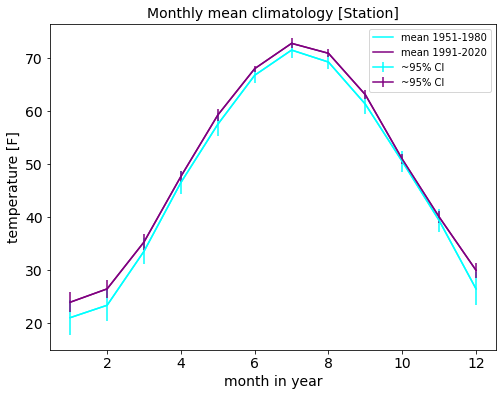

In [26]:
plt.figure(figsize=[8,6])
plt.plot(months,mean_list,color='cyan',label='mean 1951-1980')
plt.errorbar(months,mean_list,ci,color='cyan',label='~95% CI')
plt.plot(months,mean_list2,color='purple',label='mean 1991-2020')
plt.errorbar(months,mean_list2,ci2,color='purple',label='~95% CI')
plt.legend()
plt.title(f"Monthly mean climatology [Station]",fontsize=14)
plt.ylabel("temperature [F]",fontsize=14)
plt.xlabel("month in year",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

<P style="background-color:purple;color:gold;font-size:130%">
<BR>
Task 5: Calculate the t-test with the help of the function stats.ttest_ind. Choose a winter month and a summer month (or can you figure out how to apply the t-test to all months?). Where you expect to reject the null hypothesis and obtain the smallest p-value?

<BR>
<BR>
</P>
    
Tip: Check out the help or google examples for the application of the function Scipy *stats.ttest_ind*.
(see link below)

Print out the essential information: 
- the difference in the mean, 
- the t-statistic, the p-value, 
- the test decision, 
- and interpretation of the sign if the difference (sign of the t-statistic).



In [ ]:
#help(stats.ttest_ind)

In [21]:
# 30 year climatology year range
monthlist=['1','2','3','4','5','6', 
           '7','8','9','10','11','12']
monthstr=['Jan','Feb','Mar','Apr','May','Jun',
        'Jul','Aug','Sep','Oct','Nov','Dec']

df1=df.query(f"year >= 1951 and year <= 1980 and month=={mon}")
df2=df.query(f"year >= 1991 and year <= 2020 and month=={mon}")


sample1=df1['avgt'].values
sample2=df2['avgt'].values 
m1=np.mean(sample1)
m2=np.mean(sample2)
s1=np.std(sample1)
s2=np.std(sample2)
n1=np.size(sample1)
n2=np.size(sample2)
d=m2-m1
t,pvalue=stats.ttest_ind(sample1,sample2,equal_var=False)
print (f"mean   of period 1: {m1:.2f} F and mean  of period 2: {m2:.2f} F")
print (f"stddev of period 1: {s1:.2f} F and stddev of period 2: {s2:.2f} F")
print (f"(sample size period 1: {n1} and period 2: {n2})")
if pvalue<0.05:
    print(f"month {mon}: difference = {d:.3f}, p={pvalue} < significant at 5% level")
else:
    print(f"month {mon}: difference = {d:.3f}, p={pvalue} > 5% not significantly different")

mean   of period 1: 26.44 F and mean  of period 2: 29.94 F
stddev of period 1: 4.25 F and stddev of period 2: 3.87 F
(sample size period 1: 30 and period 2: 30)
month 12: difference = 3.495, p=0.0018163716832512741 < significant at 5% level


In [27]:

monthlist=[1,2,3,4,5,6,7,8,9,10,11,12] 
monthstr=['Jan','Feb','Mar','Apr','May','Jun',
        'Jul','Aug','Sep','Oct','Nov','Dec']

# significance level for the two-sided t-test
alpha=0.05

i=0
# use lists to store results
diffs=[] # differences in temperatures
pvals=[] # p-values
tvals=[] # t-statistic
significance=[] # use 1 for significant difference, 0 for not signficant 
for mon in monthlist:
    df1=df.query(f"year >= 1951 and year <= 1980 and month=={mon}")
    df2=df.query(f"year >= 1991 and year <= 2020 and month=={mon}")

    sample1=df1['avgt'].values # get numpy array with the temperature data
    sample2=df2['avgt'].values 
    m1=np.mean(sample1)
    m2=np.mean(sample2)
    s1=np.std(sample1)
    s2=np.std(sample2)
    n1=np.size(sample1)
    n2=np.size(sample2)
    d=m2-m1
    
    t,pvalue=stats.ttest_ind(sample1,sample2,equal_var=False)
    print(f"Perform t-test for differences in the mean for month {monthstr[i]}")
    print(80*"-")
    print(f"mean   of period 1: {m1:.2f} F and mean  of period 2: {m2:.2f} F")
    print(f"stddev of period 1: {s1:.2f} F and stddev of period 2: {s2:.2f} F")
    print(f"(sample size period 1: {n1} and period 2: {n2})")
    if pvalue<0.05:
        print(f"month {mon}: difference = {d:.3f}, p={pvalue} < significant at 5% level")
        significance.append(1)
    else:
        print(f"month {mon}: difference = {d:.3f}, p={pvalue} > 5% not significantly different")
        significance.append(0)
    diffs.append(d)
    pvals.append(pvalue)
    tvals.append(t)
    
    i=i+1
    
    

Perform t-test for differences in the mean for month Jan
--------------------------------------------------------------------------------
mean   of period 1: 21.04 F and mean  of period 2: 23.94 F
stddev of period 1: 4.47 F and stddev of period 2: 5.10 F
(sample size period 1: 30 and period 2: 30)
month 1: difference = 2.905, p=0.02476026468046575 < significant at 5% level
Perform t-test for differences in the mean for month Feb
--------------------------------------------------------------------------------
mean   of period 1: 23.37 F and mean  of period 2: 26.45 F
stddev of period 1: 4.10 F and stddev of period 2: 4.77 F
(sample size period 1: 30 and period 2: 30)
month 2: difference = 3.084, p=0.010639880621019629 < significant at 5% level
Perform t-test for differences in the mean for month Mar
--------------------------------------------------------------------------------
mean   of period 1: 33.53 F and mean  of period 2: 35.28 F
stddev of period 1: 3.39 F and stddev of period 2:

In [23]:
i=0
print("Month in which we detected a significant change in temperature")
print(64*'-')
for sig in significance:
    if sig==1:
        print(f"{monthstr[i]} temp difference is {diffs[i]:.2f} (p-value={pvals[i]:.4f})")
    i=i+1

Month in which we detected a significant change in temperature
----------------------------------------------------------------
Jan temp difference is 2.91 (p-value=0.0248)
Feb temp difference is 3.08 (p-value=0.0106)
May temp difference is 1.74 (p-value=0.0282)
Jun temp difference is 1.25 (p-value=0.0098)
Jul temp difference is 1.27 (p-value=0.0380)
Aug temp difference is 1.65 (p-value=0.0020)
Sep temp difference is 1.78 (p-value=0.0093)
Dec temp difference is 3.49 (p-value=0.0018)


## 3 Summary and conclusion

Some comments/remarks here.


---
### References

- [Introduction to import of modules](https://www.programiz.com/python-programming/modules)
- [Function ttest_ind from scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
- [Welch's form of the t-test](https://en.wikipedia.org/wiki/Welch%27s_t-test) (ttest_ind supports calculating this test statistic when we set the keyword parameter _equal_var=False_)